## Problem Statement:
<br>HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

<br>After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

### Step 1. Importing Packages and Loading Data

In [1]:
# Importing necessary packages
import numpy as np
from numpy.random import uniform
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
from math import isnan
from random import sample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
# To perform k-Means clustering
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Loading data from Country-data.csv file to pandas dataframe
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [75]:
# Data Description
pd.set_option('max_colwidth', 1000)
df_desc = pd.read_csv("data-dictionary.csv")
df_desc

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


#### Step 1.1 Checking for Null values

In [3]:
# Checking for null values in all the columns of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
# Checking number of missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Step 1.2 Detecting outliers and visualizing data distribution

In [5]:
# Checking for data distribution and outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


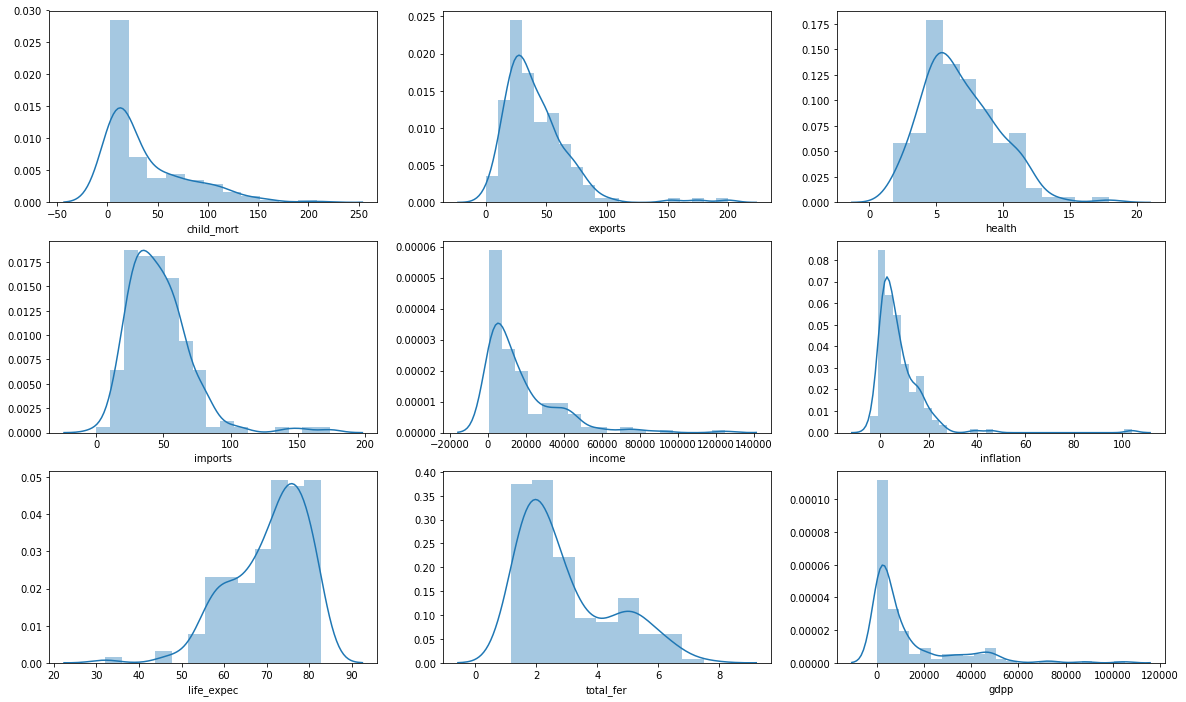

In [6]:
# Plotting distribution plot for each of the numerical columns
def plot_dist(cat_list):
    plt.figure(figsize=(20, 12))
    i=1
    for each in cat_list:
        plt.subplot(3,3,i)
        sns.distplot(df[each])
        i+=1
    plt.show()
plot_dist(df.iloc[:,1:].columns)

#### Step 1.3 Converting columns expressed in % in absolute form of relevant  column
Since, exports, health and imports are in terms of percentage of total gdp, we will convert them to get the absolute values per capita

In [7]:
# Function to calculate values
def value_conversion(row):
    return row['exports'] * row['gdpp'] / 100, row['health'] * row['gdpp'] / 100, row['imports'] * row['gdpp'] / 100

# converting columns having percentages to their original values
df[['exports', 'health', 'imports']] = pd.DataFrame(df.apply(lambda x: value_conversion(x), axis=1).tolist())

# Converting values of inflation column to absolute value
df[['inflation']] = df.gdpp - (100*df.gdpp/(df.inflation+100))

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,47.700292,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,175.749833,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,618.484065,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,646.013072,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,173.186120,76.8,2.13,12200


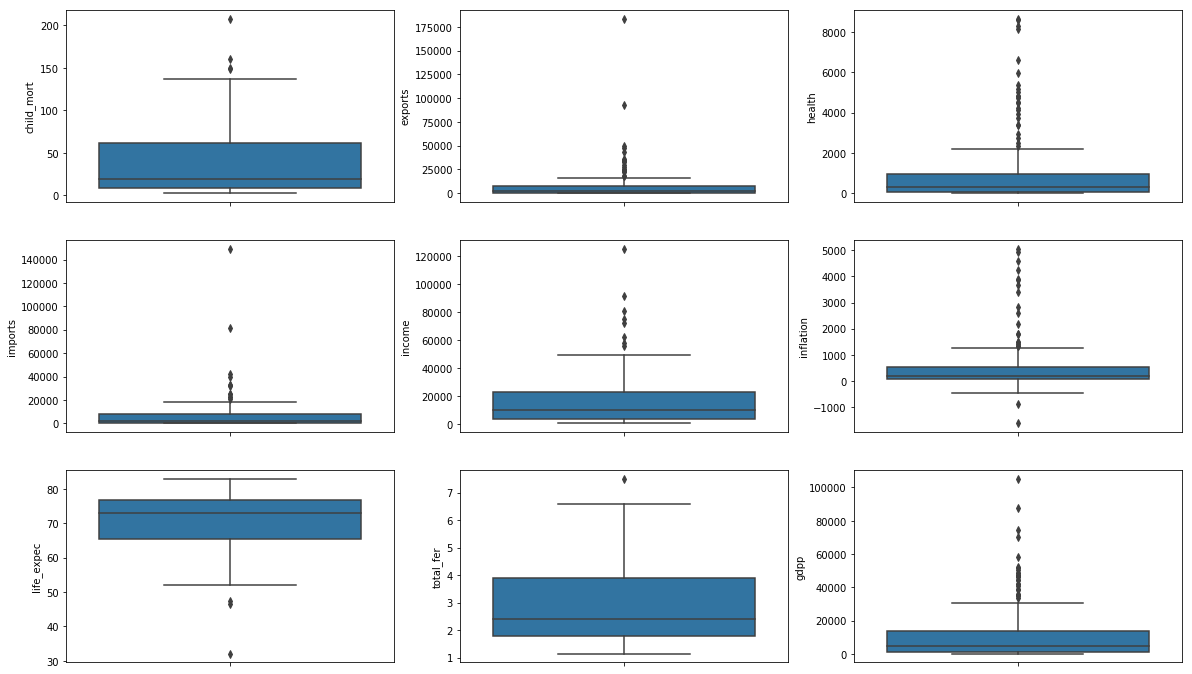

In [8]:
### boxplot to check for outliers in new data
def plot_box(cat_list):
    plt.figure(figsize=(20, 12))
    i=1
    for each in cat_list:
        plt.subplot(3,3,i)
        sns.boxplot(y = each, data = df)
        i+=1
    plt.show()
plot_box(df.iloc[:,1:].columns)

 From above box-plots, we can observe, outliers are detected in most of the features, which are need to be handeled.

In [9]:
# Checking for data distribution and outliers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,509.545722,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,984.324541,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-1620.314114,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,57.267625,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,179.298246,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,544.572053,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,1325.644960,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,2764.045727,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,4703.721993,82.370000,6.563600,79088.000000


### Step 2. Dropping non PCA related columns
Here `country` is non PCA related column, so we will drop it before doing PCA

In [10]:
pca_df = df.iloc[:,1:]
pca_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,47.700292,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,175.749833,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,618.484065,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,646.013072,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,173.186120,76.8,2.13,12200


#### Step 2.1 Plotting correlation matrix to check how much each of the features are correlated with each other

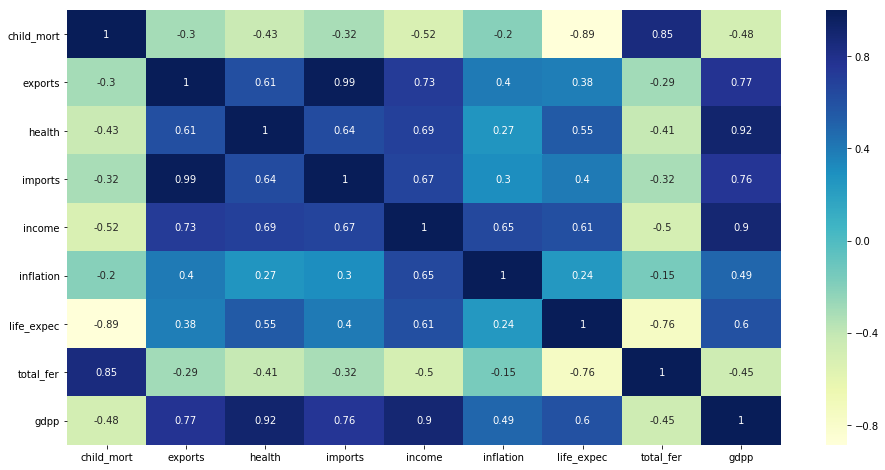

In [11]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,8))        # Size of the figure
sns.heatmap(pca_df.corr(), cmap='YlGnBu', annot = True)
plt.show()

#### Step 2.2 Normalizing the data using`StandardScaler()` of `sklearn.preprocessing` to bring them on same scale before doing PCA

In [12]:
sc = StandardScaler()
pca_df_scaled = pd.DataFrame(sc.fit_transform(pca_df), columns=pca_df.columns)
pca_df_scaled.head()

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,-0.470611,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.340132,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.111006,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,0.139058,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.342744,0.704258,-0.541946,-0.041817


In [13]:
pca_df_scaled.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,9.174298e-17,-2.260334e-17,3.589943e-17,-7.512288e-17,6.880724e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-4.140371e-01,-5.812404e-01,-4.491604e-01,-8.603259e-01,-2.170286e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-3.891452e-01,-5.446513e-01,-4.055539e-01,-7.174558e-01,-4.608626e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-3.149097e-01,-4.091560e-01,-3.097338e-01,-3.738080e-01,-3.365157e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,-7.958645e-03,-4.442811e-02,7.713036e-02,2.942370e-01,3.569115e-02,7.042584e-01,6.175252e-01,5.942100e-02
90%,1.540736e+00,5.770082e-01,1.541577e+00,5.758574e-01,1.252601e+00,8.315892e-01,1.110281e+00,1.572930e+00,1.580182e+00
95%,1.933196e+00,1.337304e+00,2.177033e+00,1.203625e+00,1.620442e+00,2.297292e+00,1.223065e+00,1.930047e+00,1.950659e+00
99%,2.863359e+00,3.201656e+00,4.094414e+00,3.326109e+00,3.497835e+00,4.273784e+00,1.332465e+00,2.395558e+00,3.618516e+00


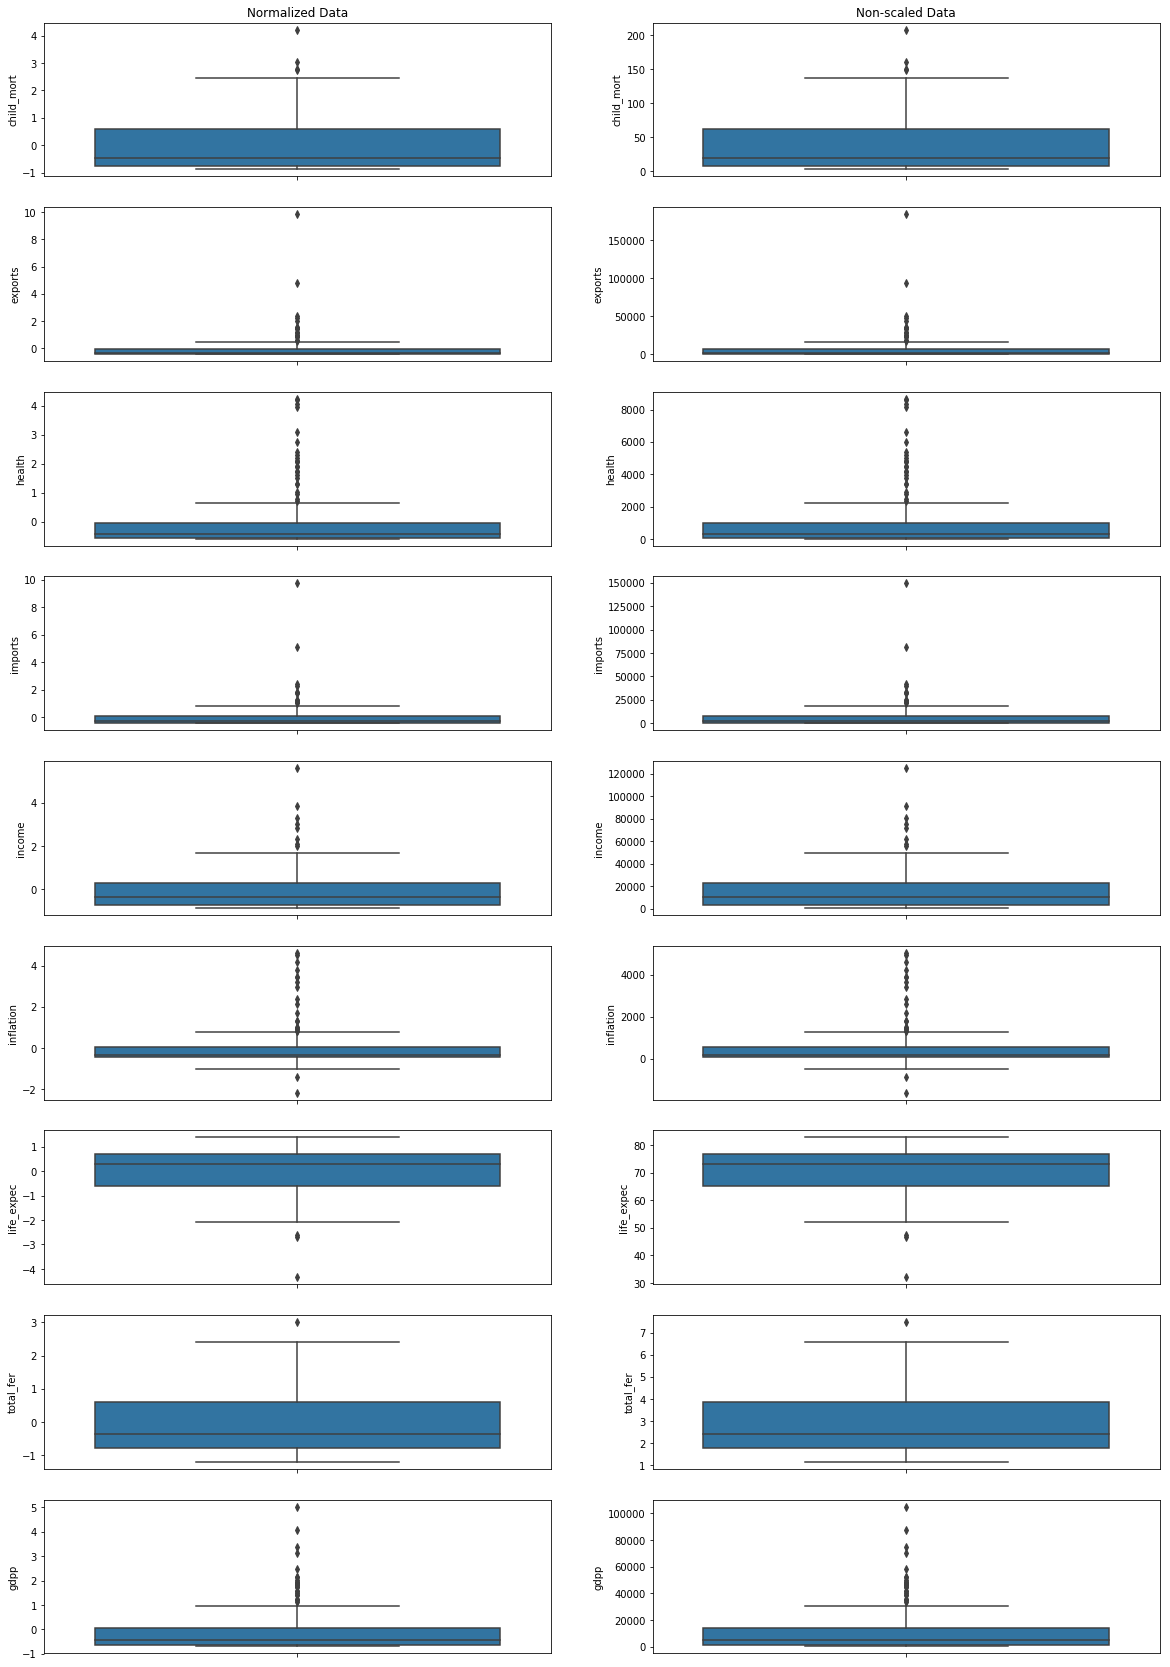

In [14]:
### boxplot to check for outliers on scaled data and non-scaled data
def plot_box(cat_list):
    plt.figure(figsize=(20, 30))
    i=1
    for each in cat_list:
        plt.subplot(9,2,i)
        if i==1:
            plt.title('Normalized Data')
        sns.boxplot(y = each, data = pca_df_scaled)
        plt.subplot(9,2,i+1)
        if i==1:
            plt.title('Non-scaled Data')
        sns.boxplot(y = each, data = df)
        i+=2
    plt.show()
plot_box(pca_df_scaled.columns)

From above boxplots of both `scaled` and `non-scaled` data, we can observe, distribution of outliers remains the same for both type of data, which shows there is no change in data distribution. This we can show using scatter plot as well

### Step 3. Calculating `principal components` and transforming our scaled data

In [15]:
# Creating PCA object with seed value as 42
pca = PCA(svd_solver='randomized', random_state=42)
#Doing the PCA on the scaled data
pca.fit(pca_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
# Checking computed PCA components
pca.components_

array([[-3.02370889e-01,  3.44219177e-01,  3.49724221e-01,
         3.41031308e-01,  3.89253997e-01,  2.17812173e-01,
         3.32389870e-01, -2.86549097e-01,  3.99901729e-01],
       [ 5.08184693e-01,  3.54886935e-01,  1.09584840e-01,
         3.19272021e-01,  1.17912815e-01,  2.22386902e-01,
        -4.12531595e-01,  4.89784889e-01,  1.68609606e-01],
       [-2.44344695e-02, -2.25305174e-01, -2.33095551e-01,
        -3.39156230e-01,  2.62789589e-01,  8.41627860e-01,
         6.91635203e-03,  3.20508381e-02, -2.84453267e-02],
       [-1.46167241e-01,  4.26820943e-01, -6.67826493e-01,
         4.06454515e-01, -6.19462882e-02,  1.03725407e-01,
        -2.13895470e-02, -1.98909175e-01, -3.61445498e-01],
       [ 2.13064449e-01, -4.73246105e-02,  8.48715327e-02,
        -5.57694621e-02,  1.05546061e-01, -3.17558467e-03,
        -6.19947967e-01, -7.36733813e-01,  6.15488656e-02],
       [ 1.84929741e-01, -3.83409439e-02, -3.90251529e-01,
        -1.66650957e-01,  7.63425429e-01, -4.179167

We can observe from above we have `9*9` matrix of PCA components

In [17]:
colnames = list(pca_df_scaled.columns)
pcs_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.302371,0.508185,-0.024434,-0.146167
1,exports,0.344219,0.354887,-0.225305,0.426821
2,health,0.349724,0.109585,-0.233096,-0.667826
3,imports,0.341031,0.319272,-0.339156,0.406455
4,income,0.389254,0.117913,0.262790,-0.061946
5,inflation,0.217812,0.222387,0.841628,0.103725
6,life_expec,0.332390,-0.412532,0.006916,-0.021390
7,total_fer,-0.286549,0.489785,0.032051,-0.198909
8,gdpp,0.399902,0.168610,-0.028445,-0.361445


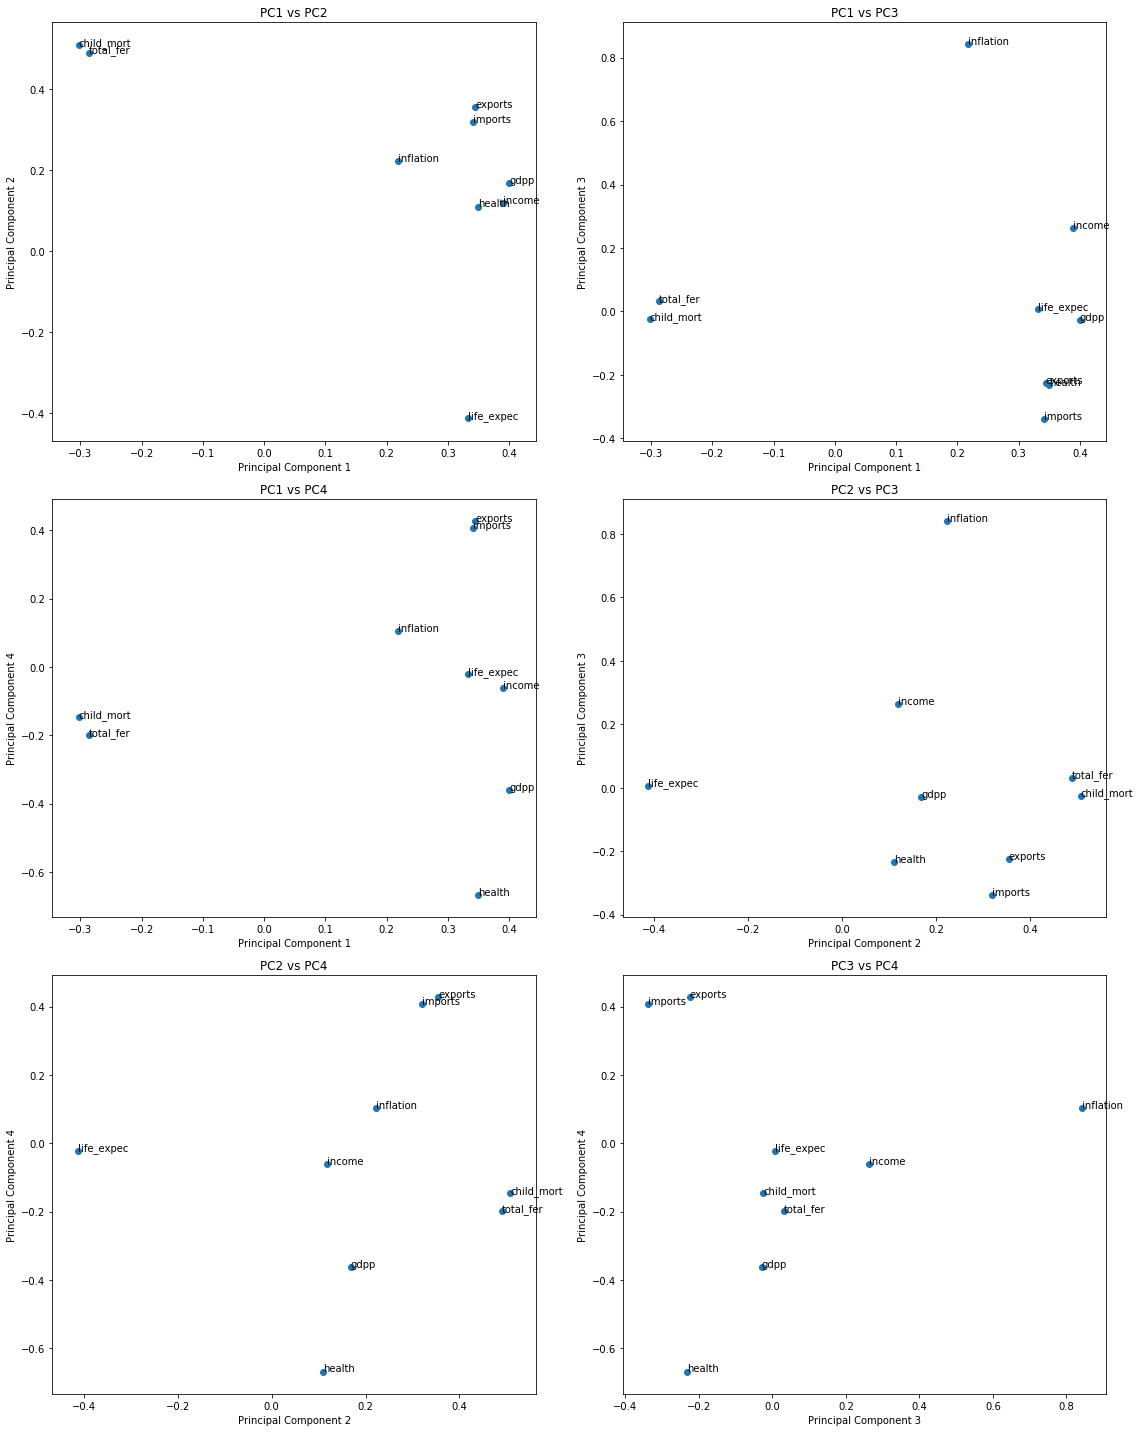

In [18]:
plt.figure(figsize = (16,20))  
plt.subplot(3,2,1)
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
    
    
plt.subplot(3,2,2)
plt.scatter(pcs_df.PC1, pcs_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PC1 vs PC3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC3[i]))
    
    
plt.subplot(3,2,3)
plt.scatter(pcs_df.PC1, pcs_df.PC4)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
plt.title('PC1 vs PC4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC4[i]))


plt.subplot(3,2,4)
plt.scatter(pcs_df.PC2, pcs_df.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PC2 vs PC3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC2[i],pcs_df.PC3[i]))


plt.subplot(3,2,5)
plt.scatter(pcs_df.PC2, pcs_df.PC4)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
plt.title('PC2 vs PC4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC2[i],pcs_df.PC4[i]))
    

plt.subplot(3,2,6)
plt.scatter(pcs_df.PC3, pcs_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PC3 vs PC4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC3[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

 From above visualization, we can observe how well each of the features are being weighted in differen principal components.

In [19]:
# Variance ratio of principal components
pca.explained_variance_ratio_

array([6.03785832e-01, 1.85160613e-01, 9.85402834e-02, 6.00145216e-02,
       2.53228916e-02, 1.59657079e-02, 9.20957387e-03, 1.55064611e-03,
       4.49930229e-04])

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60378583, 0.78894645, 0.88748673, 0.94750125, 0.97282414,
       0.98878985, 0.99799942, 0.99955007, 1.        ])

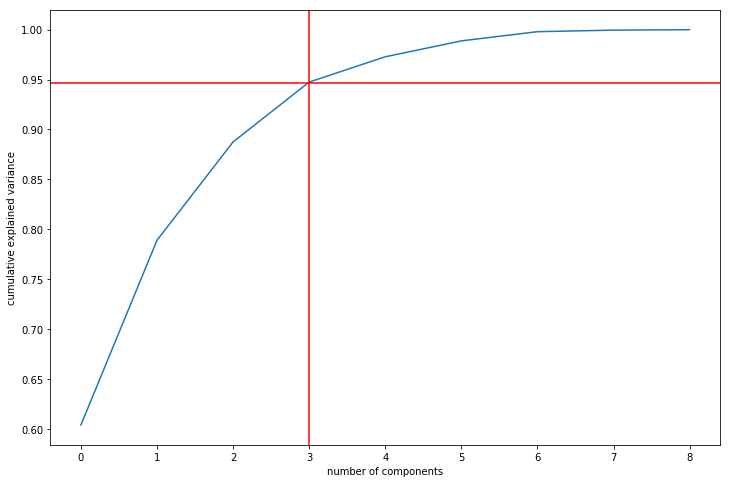

In [21]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=3, color='red')
plt.axhline(y=0.947, color='red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
PCA_final = PCA(n_components =4)
pca_features = PCA_final.fit_transform(pca_df_scaled)

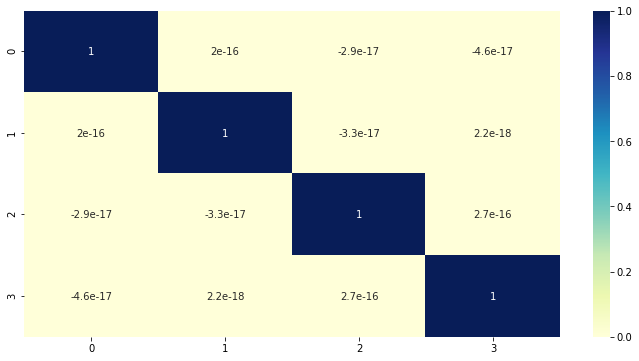

In [23]:
corrmat = np.corrcoef(pca_features.transpose())
plt.figure(figsize = (12,6))        # Size of the figure
sns.heatmap(corrmat, cmap='YlGnBu', annot = True)
plt.show()

In [24]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.706341341108554e-16 , min corr:  -4.606488068144064e-17


In [25]:
# Merging country name with new features
pca_feat_df = pd.merge(df[['country']], pd.DataFrame(pca_features), how='left', left_index=True, right_index=True)
pca_feat_df.columns = ['country','PC1', 'PC2', 'PC3', 'PC4']
pca_feat_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.649189,1.595994,-0.200006,-0.259689
1,Albania,-0.170790,-1.436693,-0.093341,0.415831
2,Algeria,-0.331375,-0.792954,0.363443,0.270636
3,Angola,-2.417244,2.151841,0.296042,-0.363746
4,Antigua and Barbuda,0.463404,-1.024364,-0.204679,0.259088


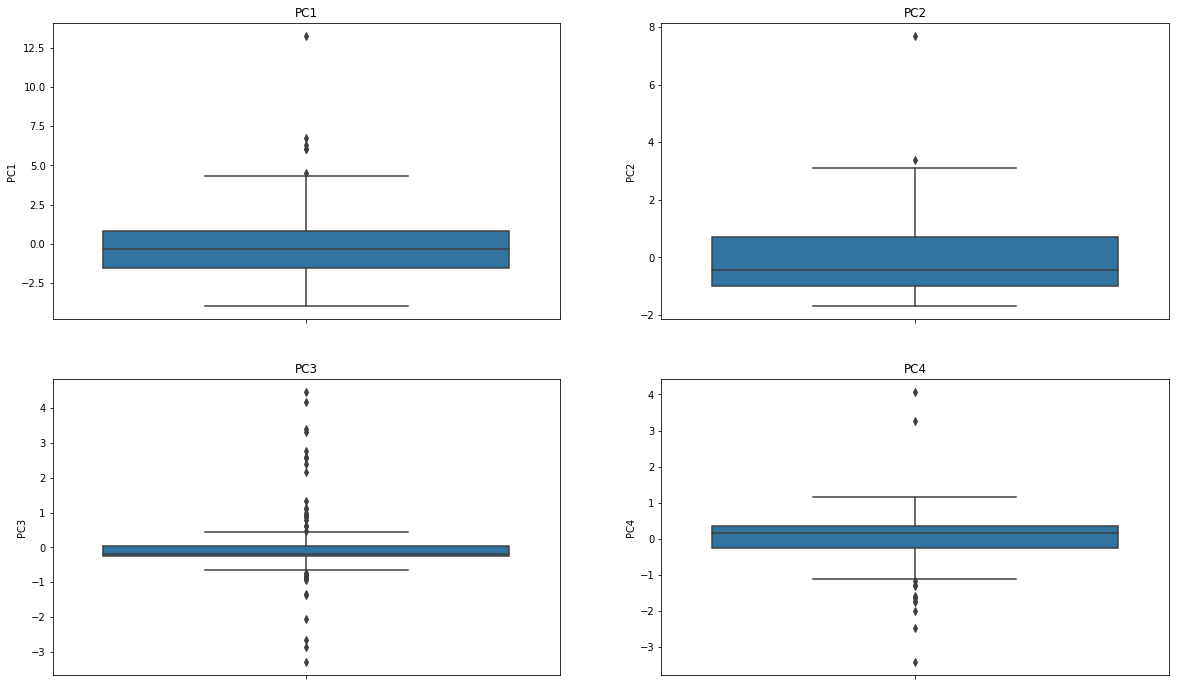

In [26]:
### boxplot to check for outliers
def plot_box(cat_list):
    plt.figure(figsize=(20, 12))
    i=1
    for each in cat_list:
        plt.subplot(2,2,i)
        plt.title(each)
        sns.boxplot(y = each, data = pca_feat_df)
        i+=1
    plt.show()
plot_box(pca_feat_df.iloc[:,1:].columns)

In [27]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final = IncrementalPCA(n_components=4)

In [28]:
df_train_pca = pca_final.fit_transform(pca_df_scaled)
df_train_pca.shape

(167, 4)

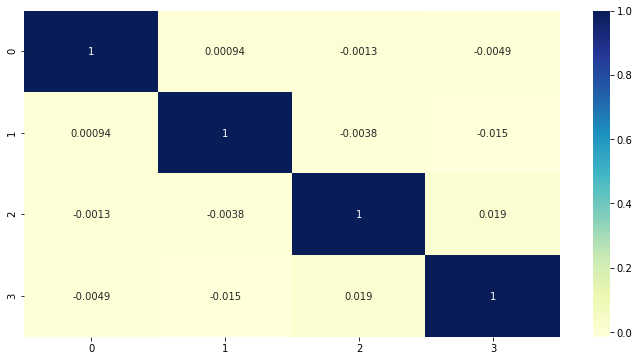

In [29]:
corrmat_i = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize = (12,6))        # Size of the figure
sns.heatmap(corrmat_i, cmap='YlGnBu', annot = True)
plt.show()

In [30]:
# 1s -> 0s in diagonals
corrmat_nodiag_i = corrmat_i - np.diagflat(corrmat_i.diagonal())
print("max corr:",corrmat_nodiag_i.max(), ", min corr: ", corrmat_nodiag_i.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.019415071509304046 , min corr:  -0.014840142047745872


In [31]:
# Merging country name with new features created using Incremental PCA
pca_inc_feature = pd.merge(df[['country']], pd.DataFrame(df_train_pca), how='left', left_index=True, right_index=True)
pca_inc_feature.columns = ['country','PC1', 'PC2', 'PC3', 'PC4']
pca_inc_feature.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.650223,1.594171,-0.216294,0.259299
1,Albania,-0.170368,-1.441953,-0.069513,-0.407604
2,Algeria,-0.330949,-0.795733,0.378479,-0.212863
3,Angola,-2.418129,2.154741,0.270594,0.385596
4,Antigua and Barbuda,0.463568,-1.029397,-0.186621,-0.237227


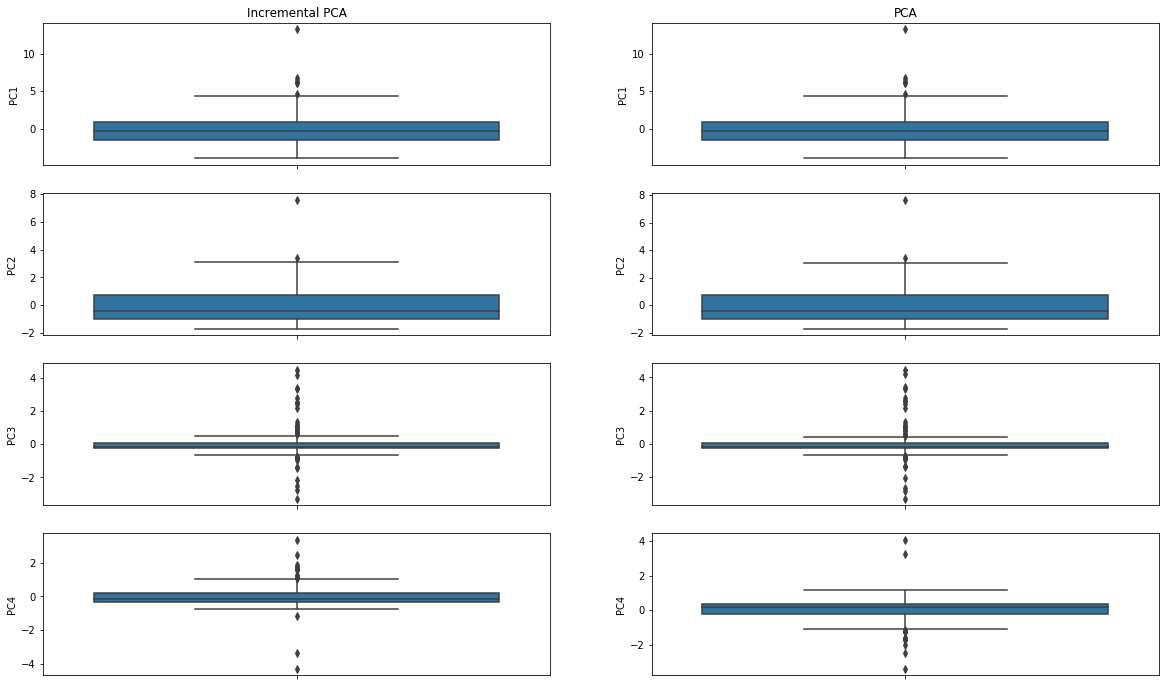

In [32]:
### boxplot to do outliers comparison in Incremental PCA and PCA
def plot_box(cat_list):
    plt.figure(figsize=(20, 12))
    i=1
    for each in cat_list:
        plt.subplot(4,2,i)
        if i==1:
            plt.title('Incremental PCA')
        sns.boxplot(y = each, data = pca_inc_feature)
        plt.subplot(4,2,i+1)
        if i==1:
            plt.title('PCA')
        sns.boxplot(y = each, data = pca_feat_df)
        i+=2
    plt.show()
plot_box(pca_inc_feature.iloc[:,1:].columns)

In [33]:
# Checking for how many components can cover 90+ percent of total data variance.
pca_again = PCA(0.94)
df_train_pca2 = pca_again.fit_transform(pca_df_scaled)
df_train_pca2.shape
# we see that PCA selected 5 components

(167, 4)

In [34]:
pca_feat_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.649189,1.595994,-0.200006,-0.259689
1,Albania,-0.170790,-1.436693,-0.093341,0.415831
2,Algeria,-0.331375,-0.792954,0.363443,0.270636
3,Angola,-2.417244,2.151841,0.296042,-0.363746
4,Antigua and Barbuda,0.463404,-1.024364,-0.204679,0.259088


Removing `outliers` using IQR method

In [35]:
Q1 = pca_feat_df.quantile(0.25)
Q3 = pca_feat_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PC1    2.368023
PC2    1.708094
PC3    0.276874
PC4    0.593965
dtype: float64


In [36]:
# Dataframe of discarded outliers
pca_feat_df_rmvd = pca_feat_df[((pca_feat_df.iloc[:,1:] < (Q1 - 1.5 * IQR)) | 
                                (pca_feat_df.iloc[:,1:] > (Q3 + 1.5 * IQR))).any(axis=1)]
pca_feat_df_rmvd.shape

(41, 5)

In [37]:
# dataframe after discarding outliers
pca_feat_df_out = pca_feat_df[~((pca_feat_df.iloc[:,1:] < (Q1 - 1.5 * IQR)) | 
                                (pca_feat_df.iloc[:,1:] > (Q3 + 1.5 * IQR))).any(axis=1)]
pca_feat_df_out.shape

(126, 5)

## k-Means Clustering

Let's Check the Hopkins statistics Value in order to determine the `CLUSTER TENDENCY`

In [38]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(pca_feat_df_out.iloc[:,1:])

0.8611603821072139

The Value 0.86 is Clearly greater than 0.5 so this Dataframe clearly shows a great Affinity for clustering.

#### Silhoutte Score

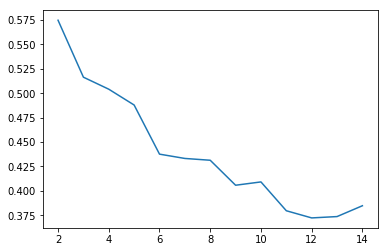

In [39]:
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_feat_df_out.iloc[:,1:])
    sse_.append([k, silhouette_score(pca_feat_df_out.iloc[:,1:], kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Let's Plot the Elbow Curve to determine the Number of Cluster `k`

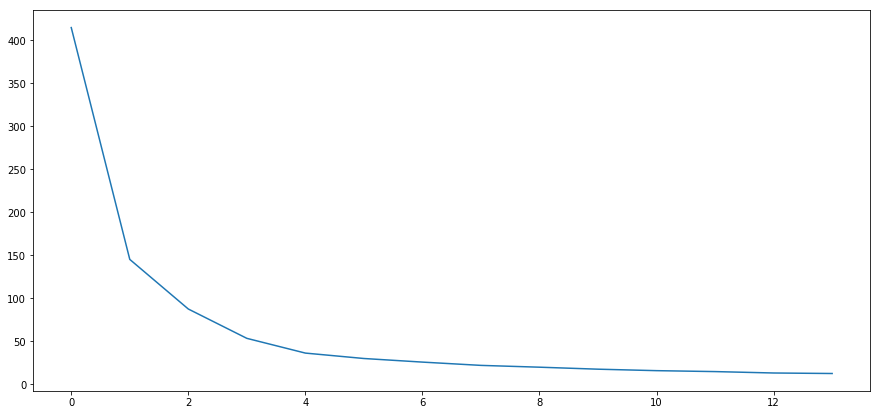

In [40]:
ssd = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100, random_state=42)
    model_clus.fit(pca_feat_df_out.iloc[:,1:])
    ssd.append(model_clus.inertia_)
plt.figure(figsize = (15,7))
plt.plot(ssd)
plt.show()

from the above diagram we Can see `k = 4` or `k = 5` would be a good choice for number of Clusters <br>

In [41]:
##### Building Model with K =2

k_model_2 = KMeans(n_clusters = 2, random_state=42, max_iter =100)

k_model_2.fit(pca_feat_df_out.iloc[:,[1,2,3,4]])

print(k_model_2.labels_)
pca_feat_df_out['K2_Cluster_ID'] = k_model_2.labels_

[1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1]


C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
##### Building Model with K =3

k_model_3 = KMeans(n_clusters = 3, random_state=42, max_iter =100)

k_model_3.fit(pca_feat_df_out.iloc[:,[1,2,3,4]])

print(k_model_3.labels_)
pca_feat_df_out['K3_Cluster_ID'] = k_model_3.labels_

[1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 1 2 2 1 1 1 2 1 2 0 2 2 2 2
 1 0 2 1 2 1 0 2 2 1 1 2 0 2 2 2 0 0 2 2 1 1 2 1 2 2 1 1 2 2 1 1 2 2 1 0 1
 2 2 2 2 2 2 1 2 1 2 0 1 1 2 2 2 2 2 0 2 1 2 1 2 1 0 1 1 0 0 2 2 1 2 2 1 2
 1 1 2 2 2 2 1 2 0 2 2 2 2 1 1]


C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
##### Building Model with K =4

k_model_4 = KMeans(n_clusters = 4, random_state=42, max_iter =100)

k_model_4.fit(pca_feat_df_out.iloc[:,[1,2,3,4]])

print(k_model_4.labels_)
pca_feat_df_out['K4_Cluster_ID'] = k_model_4.labels_

[1 0 0 1 0 0 0 2 0 0 0 1 0 2 0 2 0 1 1 2 1 0 1 1 0 0 2 1 2 0 1 0 3 0 0 0 0
 2 0 2 1 0 2 3 0 2 1 1 2 0 2 0 2 3 3 0 0 2 2 2 2 0 0 1 1 0 0 2 1 0 0 1 3 2
 0 2 0 0 0 0 1 2 2 2 3 1 2 0 0 0 2 0 3 0 2 2 2 0 1 3 2 2 3 3 0 0 2 0 2 1 0
 2 1 2 0 0 2 1 0 3 0 0 2 0 2 1]


C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
##### Building Model with K =5

k_model_5 = KMeans(n_clusters = 5, random_state=42, max_iter =100)

k_model_5.fit(pca_feat_df_out.iloc[:,[1,2,3,4]])

print(k_model_5.labels_)
pca_feat_df_out['K5_Cluster_ID'] = k_model_5.labels_

[4 2 2 4 2 2 3 3 2 2 3 4 3 3 2 1 2 4 4 3 4 3 4 4 2 2 1 4 1 2 4 2 0 3 2 3 2
 1 2 3 1 2 1 0 2 3 4 4 3 2 3 3 3 0 0 2 3 1 1 3 1 2 2 4 1 2 2 1 4 2 2 4 0 1
 2 3 2 3 2 3 4 3 1 3 0 4 1 2 3 2 3 2 0 2 1 3 1 2 4 0 1 1 0 0 2 2 1 2 3 1 2
 1 1 3 2 2 3 4 2 0 2 3 3 2 1 4]


C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
# Predicting clusters for discarded outliers
pca_feat_df_rmvd['K2_Cluster_ID'] = k_model_2.predict(pca_feat_df_rmvd.iloc[:,[1,2,3,4]])
pca_feat_df_rmvd['K3_Cluster_ID'] = k_model_3.predict(pca_feat_df_rmvd.iloc[:,[1,2,3,4]])
pca_feat_df_rmvd['K4_Cluster_ID'] = k_model_4.predict(pca_feat_df_rmvd.iloc[:,[1,2,3,4]])
pca_feat_df_rmvd['K5_Cluster_ID'] = k_model_5.predict(pca_feat_df_rmvd.iloc[:,[1,2,3,4]])
pca_feat_df_rmvd.head()

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,country,PC1,PC2,PC3,PC4,K2_Cluster_ID,K3_Cluster_ID,K4_Cluster_ID,K5_Cluster_ID
5,Argentina,0.477045,-0.688523,1.333635,0.147370,0,2,0,2
7,Australia,3.066656,-0.397143,-0.233199,-1.716824,0,0,3,0
8,Austria,3.648372,-0.007478,-0.896765,-1.158316,0,0,3,0
10,Bahamas,1.221624,-0.539356,-0.792235,-0.372322,0,0,3,0
11,Bahrain,1.656476,-0.234119,0.938113,0.351714,0,0,3,0


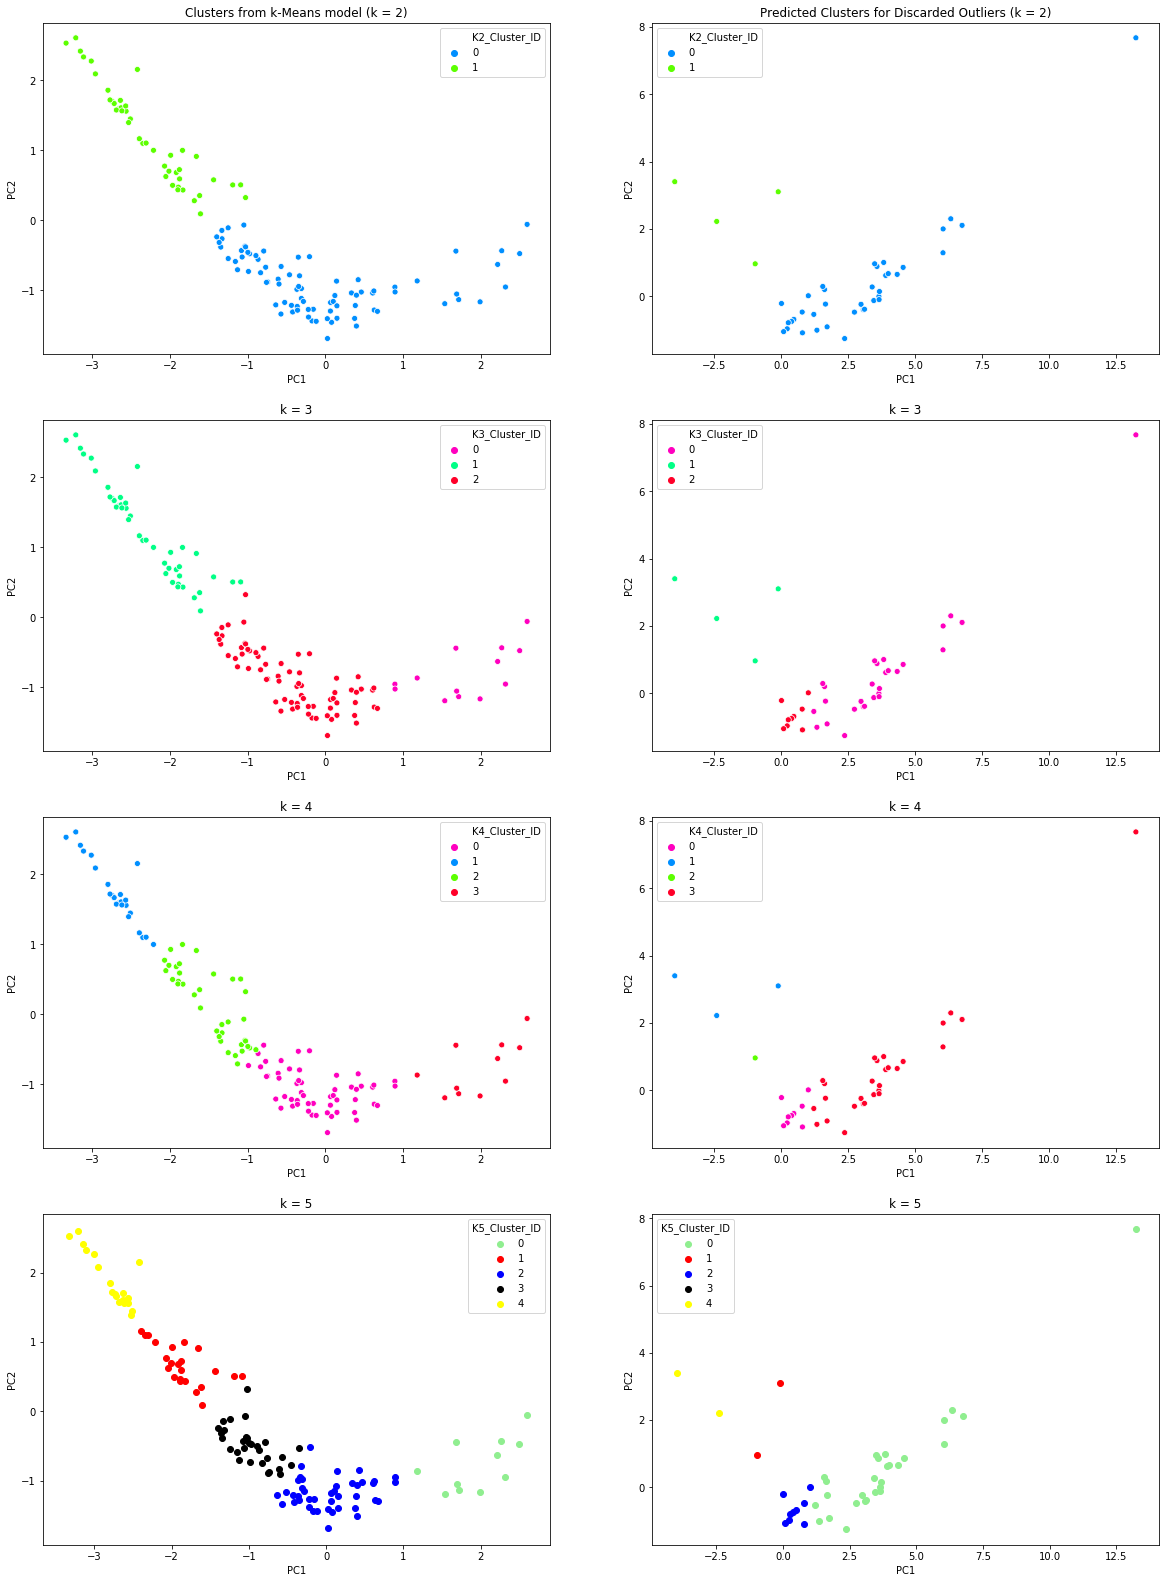

In [46]:
y = pca_feat_df_out['K5_Cluster_ID']          # Split off classifications
X = pca_feat_df_out.iloc[:, 1:-1] # Split off features
plt.figure(figsize = (20,28))
plt.subplot(4,2,1)
plt.title('Clusters from k-Means model (k = 2)')
sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['K2_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(4,2,3)
plt.title('k = 3')
sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['K3_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(4,2,5)
plt.title('k = 4')
sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['K4_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(4,2,7)
# colors = ["windows blue" "amber" "greyish" "faded green" "dusty purple"]
plt.title('k = 5')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_feat_df_out[y==0]['PC1'], pca_feat_df_out[y==0]['PC2'], label='0', c='lightgreen')
plt.scatter(pca_feat_df_out[y==1]['PC1'], pca_feat_df_out[y==1]['PC2'], label='1', c='red')
plt.scatter(pca_feat_df_out[y==2]['PC1'], pca_feat_df_out[y==2]['PC2'], label='2', c='blue')
plt.scatter(pca_feat_df_out[y==3]['PC1'], pca_feat_df_out[y==3]['PC2'], label='3', c='black')
plt.scatter(pca_feat_df_out[y==4]['PC1'], pca_feat_df_out[y==4]['PC2'], label='4', c='yellow')
# sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['K5_Cluster_ID'], palette='rainbow_r')
plt.legend(title="K5_Cluster_ID")

y = pca_feat_df_rmvd['K5_Cluster_ID']          # Split off classifications
X = pca_feat_df_rmvd.iloc[:, 1:-1] # Split off features
plt.subplot(4,2,2)
plt.title('Predicted Clusters for Discarded Outliers (k = 2)')
sns.scatterplot(x=pca_feat_df_rmvd.PC1, y=pca_feat_df_rmvd.PC2, hue = pca_feat_df_rmvd['K2_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(4,2,4)
plt.title('k = 3')
sns.scatterplot(x=pca_feat_df_rmvd.PC1, y=pca_feat_df_rmvd.PC2, hue = pca_feat_df_rmvd['K3_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(4,2,6)
plt.title('k = 4')
sns.scatterplot(x=pca_feat_df_rmvd.PC1, y=pca_feat_df_rmvd.PC2, hue = pca_feat_df_rmvd['K4_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(4,2,8)
# colors = ["windows blue" "amber" "greyish" "faded green" "dusty purple"]
plt.title('k = 5')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_feat_df_rmvd[y==0]['PC1'], pca_feat_df_rmvd[y==0]['PC2'], label='0', c='lightgreen')
plt.scatter(pca_feat_df_rmvd[y==1]['PC1'], pca_feat_df_rmvd[y==1]['PC2'], label='1', c='red')
plt.scatter(pca_feat_df_rmvd[y==2]['PC1'], pca_feat_df_rmvd[y==2]['PC2'], label='2', c='blue')
plt.scatter(pca_feat_df_rmvd[y==3]['PC1'], pca_feat_df_rmvd[y==3]['PC2'], label='3', c='black')
plt.scatter(pca_feat_df_rmvd[y==4]['PC1'], pca_feat_df_rmvd[y==4]['PC2'], label='4', c='yellow')
# sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['K5_Cluster_ID'], palette='rainbow_r')
plt.legend(title="K5_Cluster_ID")
plt.show()

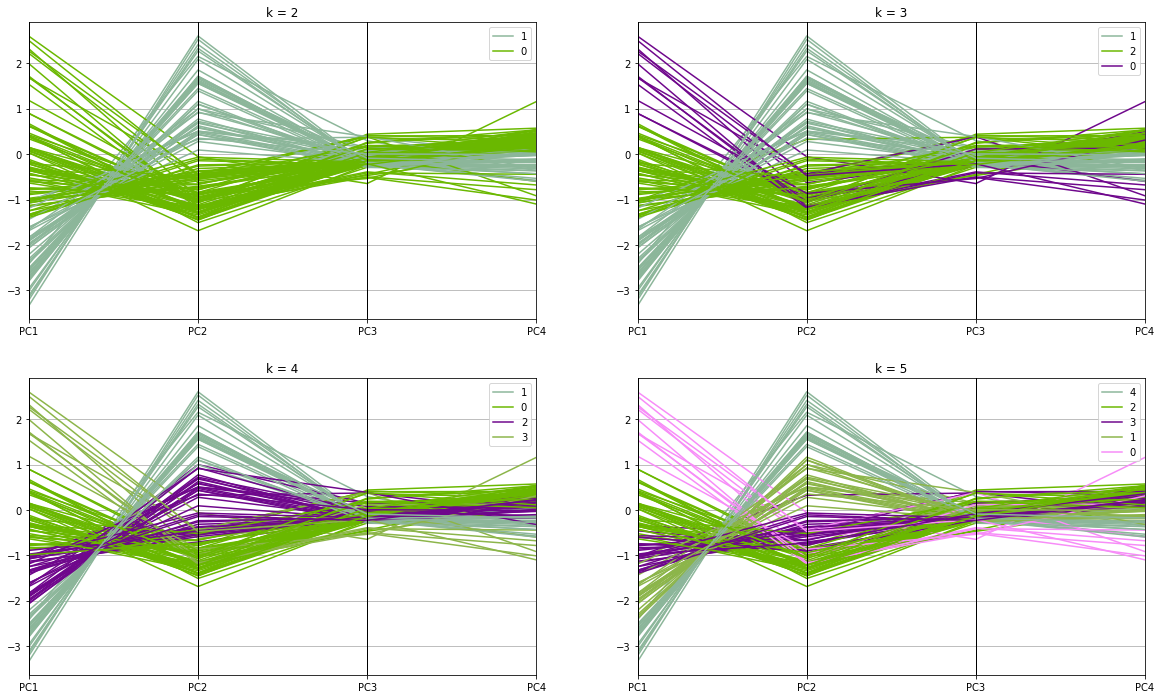

In [47]:
# Perform parallel coordinate plot
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.title('k = 2')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,5]], 'K2_Cluster_ID')
plt.subplot(2,2,2)
plt.title('k = 3')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,6]], 'K3_Cluster_ID')
plt.subplot(2,2,3)
plt.title('k = 4')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,7]], 'K4_Cluster_ID')
plt.subplot(2,2,4)
plt.title('k = 5')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,8]], 'K5_Cluster_ID')
plt.show()

## Heirarchical Clustering

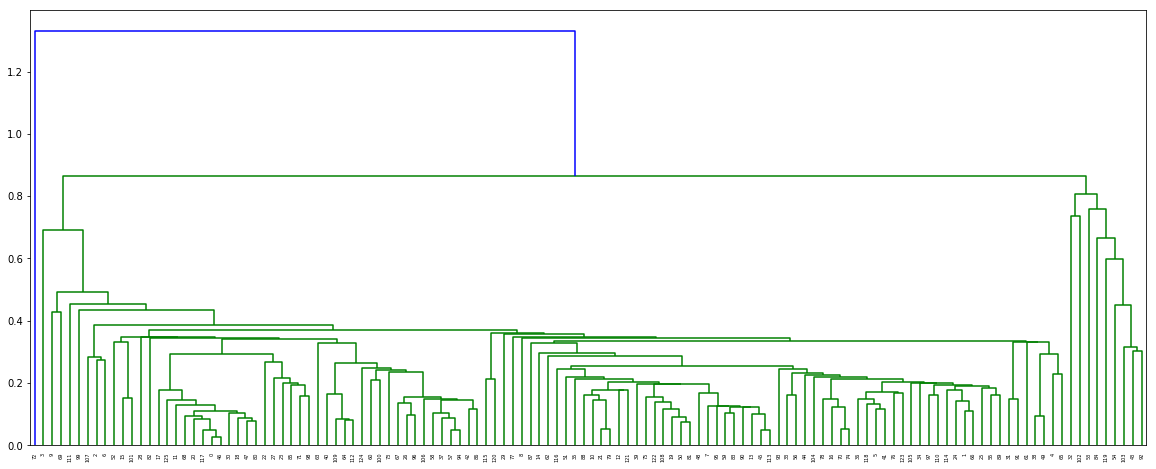

In [48]:
# heirarchical clustering
plt.figure(figsize = (20,8))
mergings = linkage(pca_feat_df_out.iloc[:,[1,2,3,4]], method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

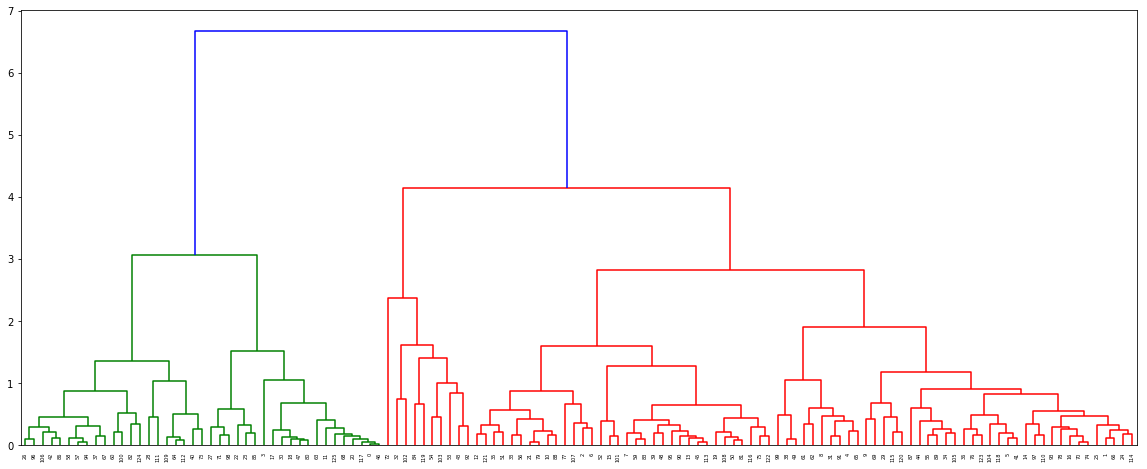

In [49]:
plt.figure(figsize = (20,8))
mergings = linkage(pca_feat_df_out.iloc[:,[1,2,3,4]], method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [50]:
clusterCut3 = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
clusterCut3.index = pca_feat_df_out.index
pca_feat_df_out['H3_Cluster_ID'] = clusterCut3.astype(int)

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
clusterCut4 = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clusterCut4.index = pca_feat_df_out.index
pca_feat_df_out['H4_Cluster_ID'] = clusterCut4.astype(int)

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
clusterCut5 = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
clusterCut5.index = pca_feat_df_out.index
pca_feat_df_out['H5_Cluster_ID'] = clusterCut5.astype(int)

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
clusterCut6 = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
clusterCut6.index = pca_feat_df_out.index
pca_feat_df_out['H6_Cluster_ID'] = clusterCut6.astype(int)

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


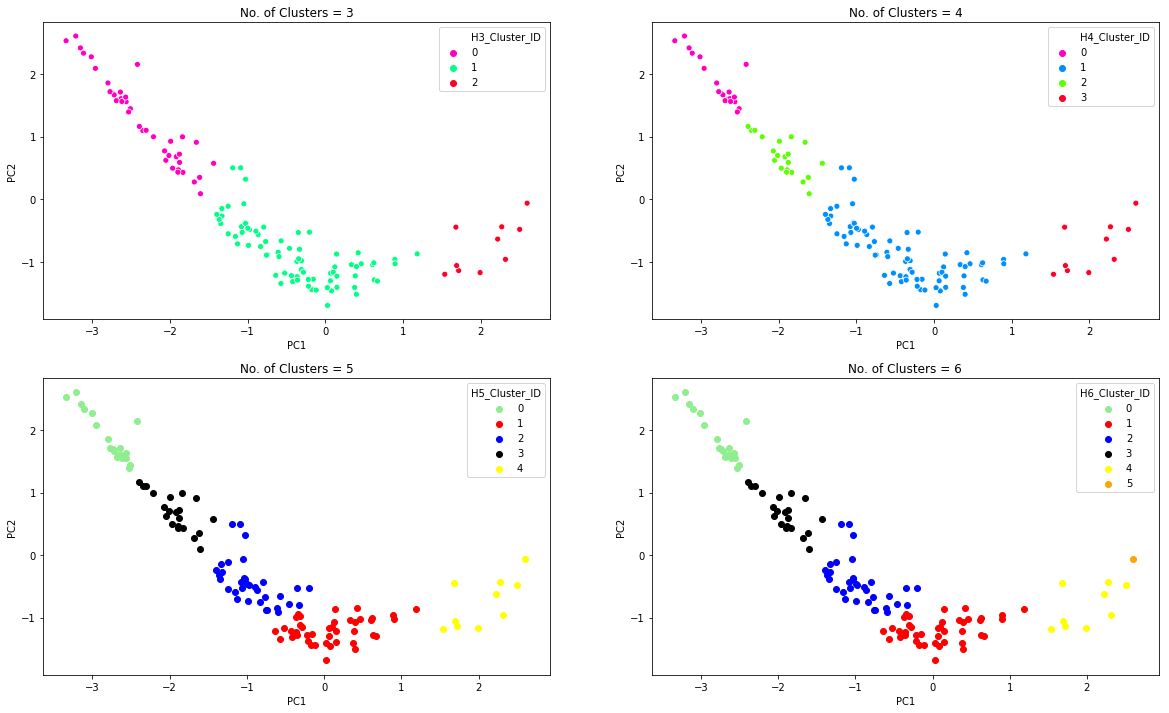

In [54]:
y5 = pca_feat_df_out['H5_Cluster_ID']          # Split off classifications
y6 = pca_feat_df_out['H6_Cluster_ID']
X = pca_feat_df_out.iloc[:, [1,2,3,4]] # Split off features
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.title('No. of Clusters = 3')
sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['H3_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(2,2,2)
plt.title('No. of Clusters = 4')
sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['H4_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(2,2,3)
plt.title('No. of Clusters = 5')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_feat_df_out[y5==0]['PC1'], pca_feat_df_out[y5==0]['PC2'], label='0', c='lightgreen')
plt.scatter(pca_feat_df_out[y5==1]['PC1'], pca_feat_df_out[y5==1]['PC2'], label='1', c='red')
plt.scatter(pca_feat_df_out[y5==2]['PC1'], pca_feat_df_out[y5==2]['PC2'], label='2', c='blue')
plt.scatter(pca_feat_df_out[y5==3]['PC1'], pca_feat_df_out[y5==3]['PC2'], label='3', c='black')
plt.scatter(pca_feat_df_out[y5==4]['PC1'], pca_feat_df_out[y5==4]['PC2'], label='4', c='yellow')
plt.legend(title="H5_Cluster_ID")
# sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['H5_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(2,2,4)
plt.title('No. of Clusters = 6')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_feat_df_out[y6==0]['PC1'], pca_feat_df_out[y6==0]['PC2'], label='0', c='lightgreen')
plt.scatter(pca_feat_df_out[y6==1]['PC1'], pca_feat_df_out[y6==1]['PC2'], label='1', c='red')
plt.scatter(pca_feat_df_out[y6==2]['PC1'], pca_feat_df_out[y6==2]['PC2'], label='2', c='blue')
plt.scatter(pca_feat_df_out[y6==3]['PC1'], pca_feat_df_out[y6==3]['PC2'], label='3', c='black')
plt.scatter(pca_feat_df_out[y6==4]['PC1'], pca_feat_df_out[y6==4]['PC2'], label='4', c='yellow')
plt.scatter(pca_feat_df_out[y6==5]['PC1'], pca_feat_df_out[y6==5]['PC2'], label='5', c='orange')
plt.legend(title="H6_Cluster_ID")
# sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['H6_Cluster_ID'], palette='gist_rainbow_r')


plt.show()

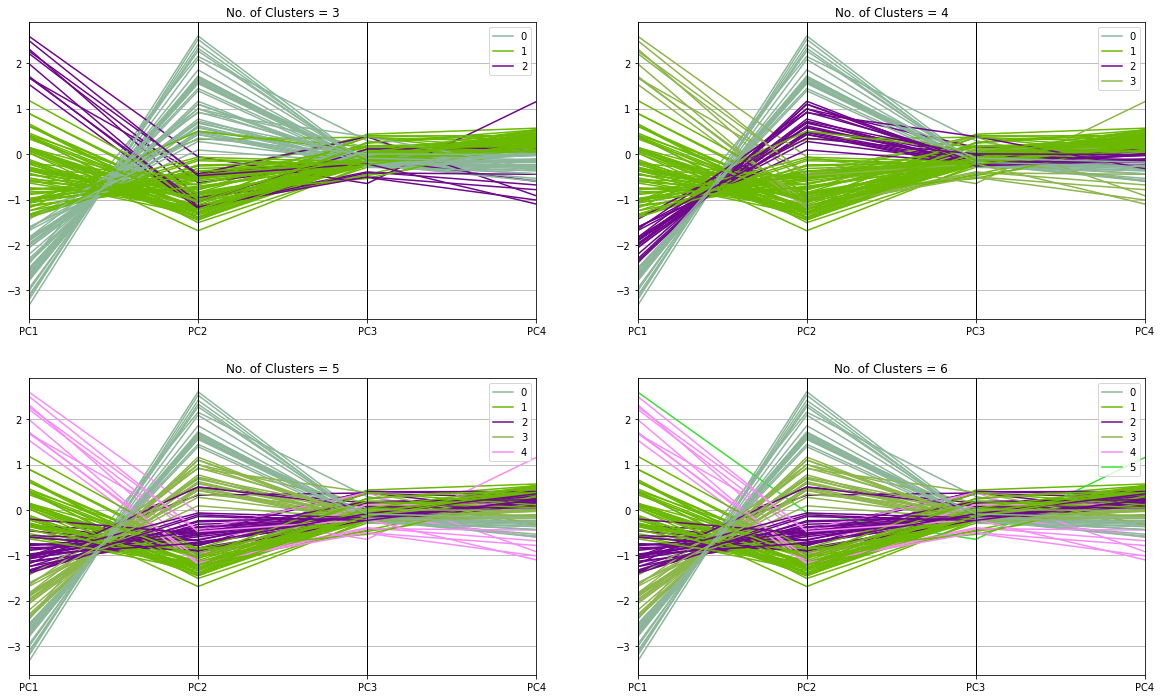

In [55]:
# Perform parallel coordinate plot
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.title('No. of Clusters = 3')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,-4]], 'H3_Cluster_ID')
plt.subplot(2,2,2)
plt.title('No. of Clusters = 4')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,-3]], 'H4_Cluster_ID')
plt.subplot(2,2,3)
plt.title('No. of Clusters = 5')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,-2]], 'H5_Cluster_ID')
plt.subplot(2,2,4)
plt.title('No. of Clusters = 6')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,-1]], 'H6_Cluster_ID')
plt.show()

In [56]:
# Count of values in each clusters for different modesl created
column = pca_feat_df_out.iloc[:,5:].columns
cluster_count_df = pd.DataFrame()
z = pd.DataFrame()
for each in column:
    z = z.append(pd.DataFrame(np.sort(pca_feat_df_out.groupby(each).count()['country'].values)).T)
z.index = pca_feat_df_out.iloc[:,5:].columns
z.columns = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
z

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
K2_Cluster_ID,44,82,NaN,NaN,NaN,NaN
K3_Cluster_ID,13,43,70.0,NaN,NaN,NaN
K4_Cluster_ID,11,24,37.0,54.0,NaN,NaN
K5_Cluster_ID,11,20,23.0,30.0,42.0,NaN
H3_Cluster_ID,10,41,75.0,NaN,NaN,NaN
H4_Cluster_ID,10,20,21.0,75.0,NaN,NaN
H5_Cluster_ID,10,20,21.0,34.0,41.0,NaN
H6_Cluster_ID,1,9,20.0,21.0,34.0,41.0


From above analysis and observation 5 clusters are good enough to proceed further and make inferences.

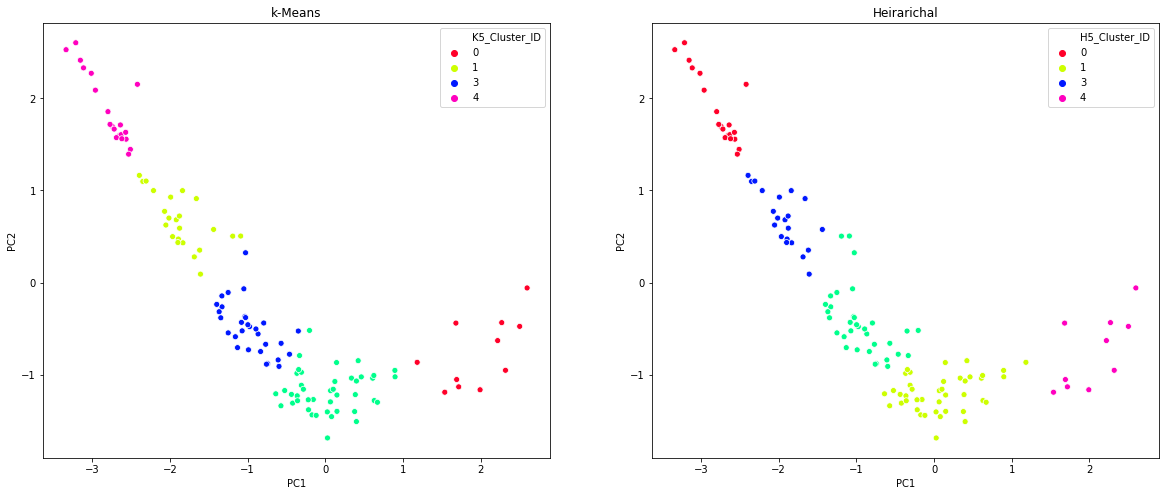

In [57]:
# Visualization for 5 clusters
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('k-Means')
sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['K5_Cluster_ID'], palette='gist_rainbow')
plt.subplot(1,2,2)
plt.title('Heirarichal')
sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['H5_Cluster_ID'], palette='gist_rainbow')
plt.show()

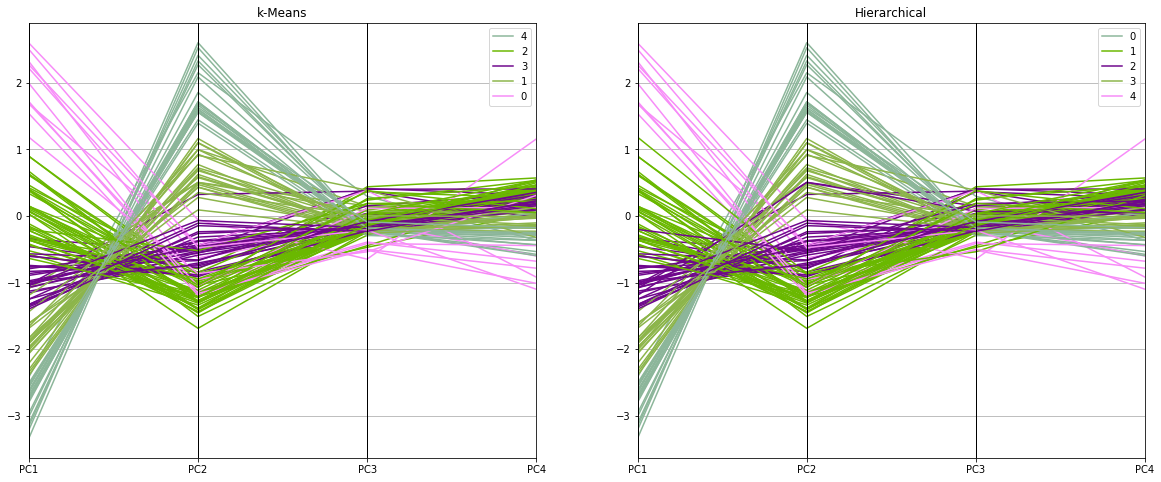

In [58]:
plt.figure(figsize = (20,8))
# Perform parallel coordinate plot for k-Means
plt.subplot(1,2,1)
plt.title('k-Means')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,8]], 'K5_Cluster_ID')
# Perform parallel coordinate plot for Heirarichal
plt.subplot(1,2,2)
plt.title('Hierarchical')
parallel_coordinates(pca_feat_df_out.iloc[:,[1,2,3,4,11]], 'H5_Cluster_ID')
plt.show()

In [59]:
# Reset Index of Clustered DataFrame for creation of scatter plot with country name annotation
pca_feat_df_out = pca_feat_df_out.reset_index(drop=True)
pca_feat_df_out.tail()

,country,PC1,PC2,PC3,PC4,K2_Cluster_ID,K3_Cluster_ID,K4_Cluster_ID,K5_Cluster_ID,H3_Cluster_ID,H4_Cluster_ID,H5_Cluster_ID,H6_Cluster_ID
121,Uzbekistan,-0.988489,-0.730469,-0.083062,0.354156,0,2,0,3,1,1,2,2
122,Vanuatu,-1.330459,-0.145391,-0.230172,0.228004,0,2,2,3,1,1,2,2
123,Vietnam,-0.637115,-1.207860,-0.145698,0.464062,0,2,0,2,1,1,1,1
124,Yemen,-1.616444,0.351734,0.004363,-0.010979,1,1,2,1,0,2,3,3
125,Zambia,-2.568016,1.630520,-0.090114,-0.177027,1,1,1,4,0,0,0,0


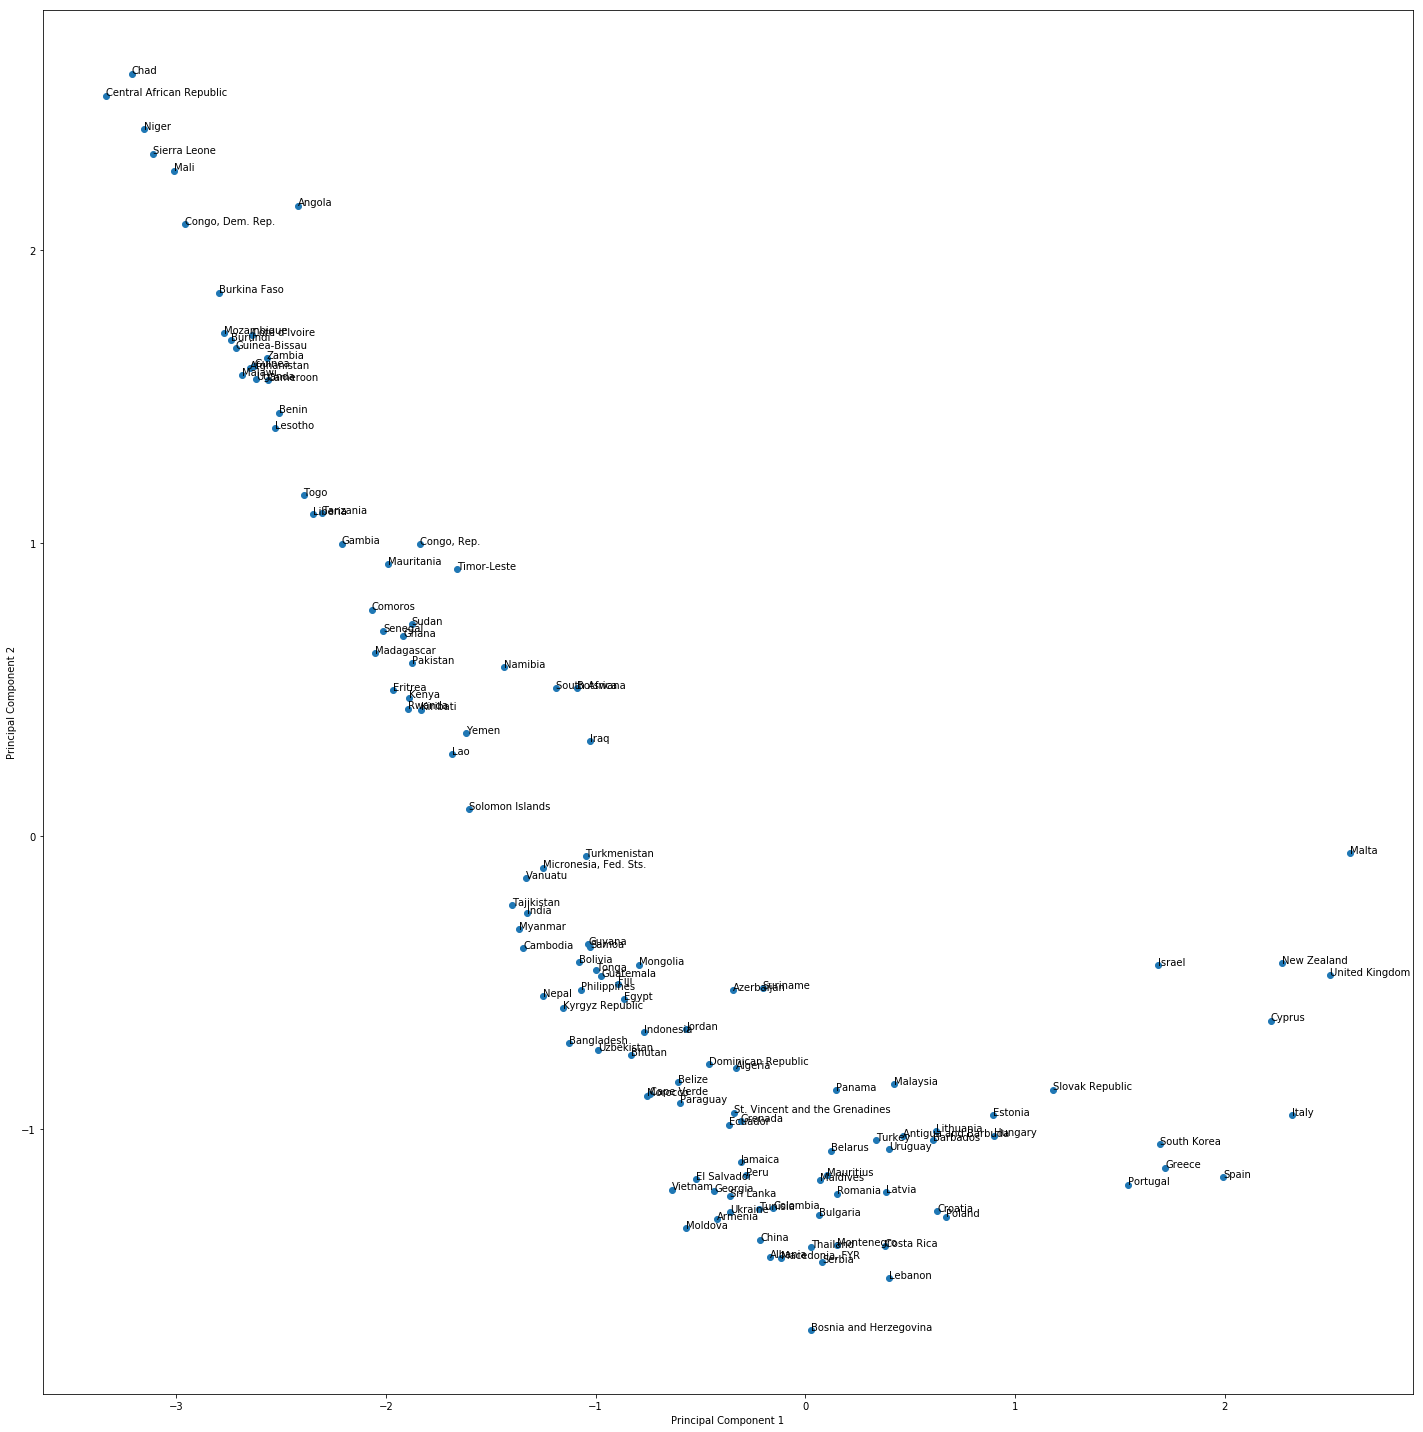

In [60]:
# Annotating countries name with data points with PC1 and PC2
fig = plt.figure(figsize = (20,20))
plt.scatter(pca_feat_df_out.PC1, pca_feat_df_out.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_feat_df_out.country):
    plt.annotate(txt, (pca_feat_df_out.PC1[i], pca_feat_df_out.PC2[i]))
plt.tight_layout()
plt.show()

In [61]:
# combining both dataframes- pca_feat_df_out and pca_feat_df_rmvd
k_df = pd.concat([pca_feat_df_out.iloc[:,:9],pca_feat_df_rmvd], axis=0, ignore_index=True)
k_df.head()

,country,PC1,PC2,PC3,PC4,K2_Cluster_ID,K3_Cluster_ID,K4_Cluster_ID,K5_Cluster_ID
0,Afghanistan,-2.649189,1.595994,-0.200006,-0.259689,1,1,1,4
1,Albania,-0.170790,-1.436693,-0.093341,0.415831,0,2,0,2
2,Algeria,-0.331375,-0.792954,0.363443,0.270636,0,2,0,2
3,Angola,-2.417244,2.151841,0.296042,-0.363746,1,1,1,4
4,Antigua and Barbuda,0.463404,-1.024364,-0.204679,0.259088,0,2,0,2


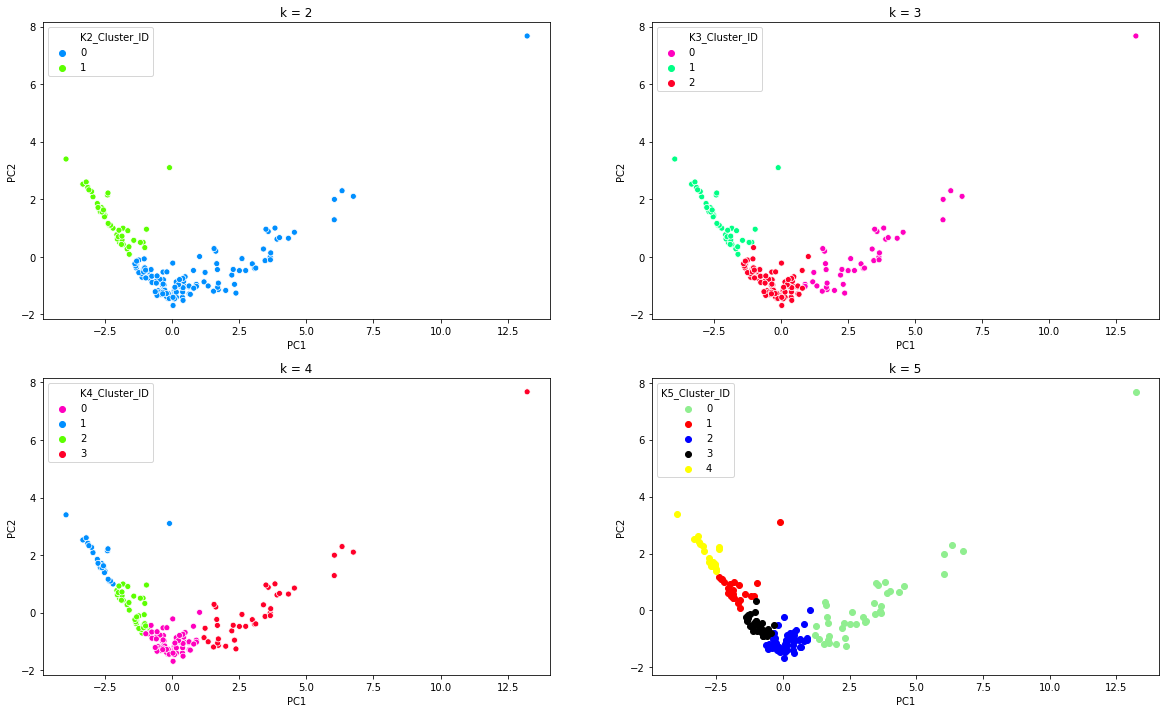

In [62]:
# Visualizing clusters for all data points for different k values
y = k_df['K5_Cluster_ID']          # Split off classifications
X = k_df.iloc[:, 1:-1] # Split off features
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.title('k = 2')
sns.scatterplot(x=k_df.PC1, y=k_df.PC2, hue = k_df['K2_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(2,2,2)
plt.title('k = 3')
sns.scatterplot(x=k_df.PC1, y=k_df.PC2, hue = k_df['K3_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(2,2,3)
plt.title('k = 4')
sns.scatterplot(x=k_df.PC1, y=k_df.PC2, hue = k_df['K4_Cluster_ID'], palette='gist_rainbow_r')
plt.subplot(2,2,4)
# colors = ["windows blue" "amber" "greyish" "faded green" "dusty purple"]
plt.title('k = 5')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(k_df[y==0]['PC1'], k_df[y==0]['PC2'], label='0', c='lightgreen')
plt.scatter(k_df[y==1]['PC1'], k_df[y==1]['PC2'], label='1', c='red')
plt.scatter(k_df[y==2]['PC1'], k_df[y==2]['PC2'], label='2', c='blue')
plt.scatter(k_df[y==3]['PC1'], k_df[y==3]['PC2'], label='3', c='black')
plt.scatter(k_df[y==4]['PC1'], k_df[y==4]['PC2'], label='4', c='yellow')
# sns.scatterplot(x=pca_feat_df_out.PC1, y=pca_feat_df_out.PC2, hue = pca_feat_df_out['K5_Cluster_ID'], palette='rainbow_r')
plt.legend(title="K5_Cluster_ID")
plt.show()

Merging cluster dataframe i.e., `k_df` and original dataframe i.e., `df`

In [63]:
final_df = df.merge(k_df, how='left')
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,K2_Cluster_ID,K3_Cluster_ID,K4_Cluster_ID,K5_Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,47.700292,56.2,5.82,553,-2.649189,1.595994,-0.200006,-0.259689,1,1,1,4
1,Albania,16.6,1145.20,267.8950,1987.740,9930,175.749833,76.3,1.65,4090,-0.170790,-1.436693,-0.093341,0.415831,0,2,0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,618.484065,76.5,2.89,4460,-0.331375,-0.792954,0.363443,0.270636,0,2,0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,646.013072,60.1,6.16,3530,-2.417244,2.151841,0.296042,-0.363746,1,1,1,4
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,173.186120,76.8,2.13,12200,0.463404,-1.024364,-0.204679,0.259088,0,2,0,2


Keeping relevant columns for analysis, i.e., original features and K5_Cluster_ID

In [64]:
final_df = final_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,17]]
final_mean_df = final_df.groupby('K5_Cluster_ID').mean().reset_index()
final_mean_df

,K5_Cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4
0,0,5.671795,25399.741026,3592.165897,21462.517949,45071.794872,1140.768910,79.733333,1.815897,40933.333333,3.306805,0.200603,-0.016500,-0.433292
1,1,70.412000,1352.564592,160.312948,1211.258120,5271.600000,338.173638,62.604000,4.494000,2701.720000,-1.752546,0.779627,0.030742,-0.038492
2,2,14.086275,3445.845686,521.443118,3652.744902,14512.156863,467.257728,74.801961,1.910392,7830.980392,0.114162,-1.088302,0.119037,0.342974
3,3,36.370000,1083.108951,155.112713,1292.124370,6362.333333,185.448043,69.400000,2.966667,2736.400000,-0.967160,-0.493948,-0.089629,0.247564
4,4,118.186364,300.360645,51.144136,358.246727,1935.590909,125.282806,55.054545,5.577727,890.863636,-2.816328,1.954891,-0.159412,-0.320814


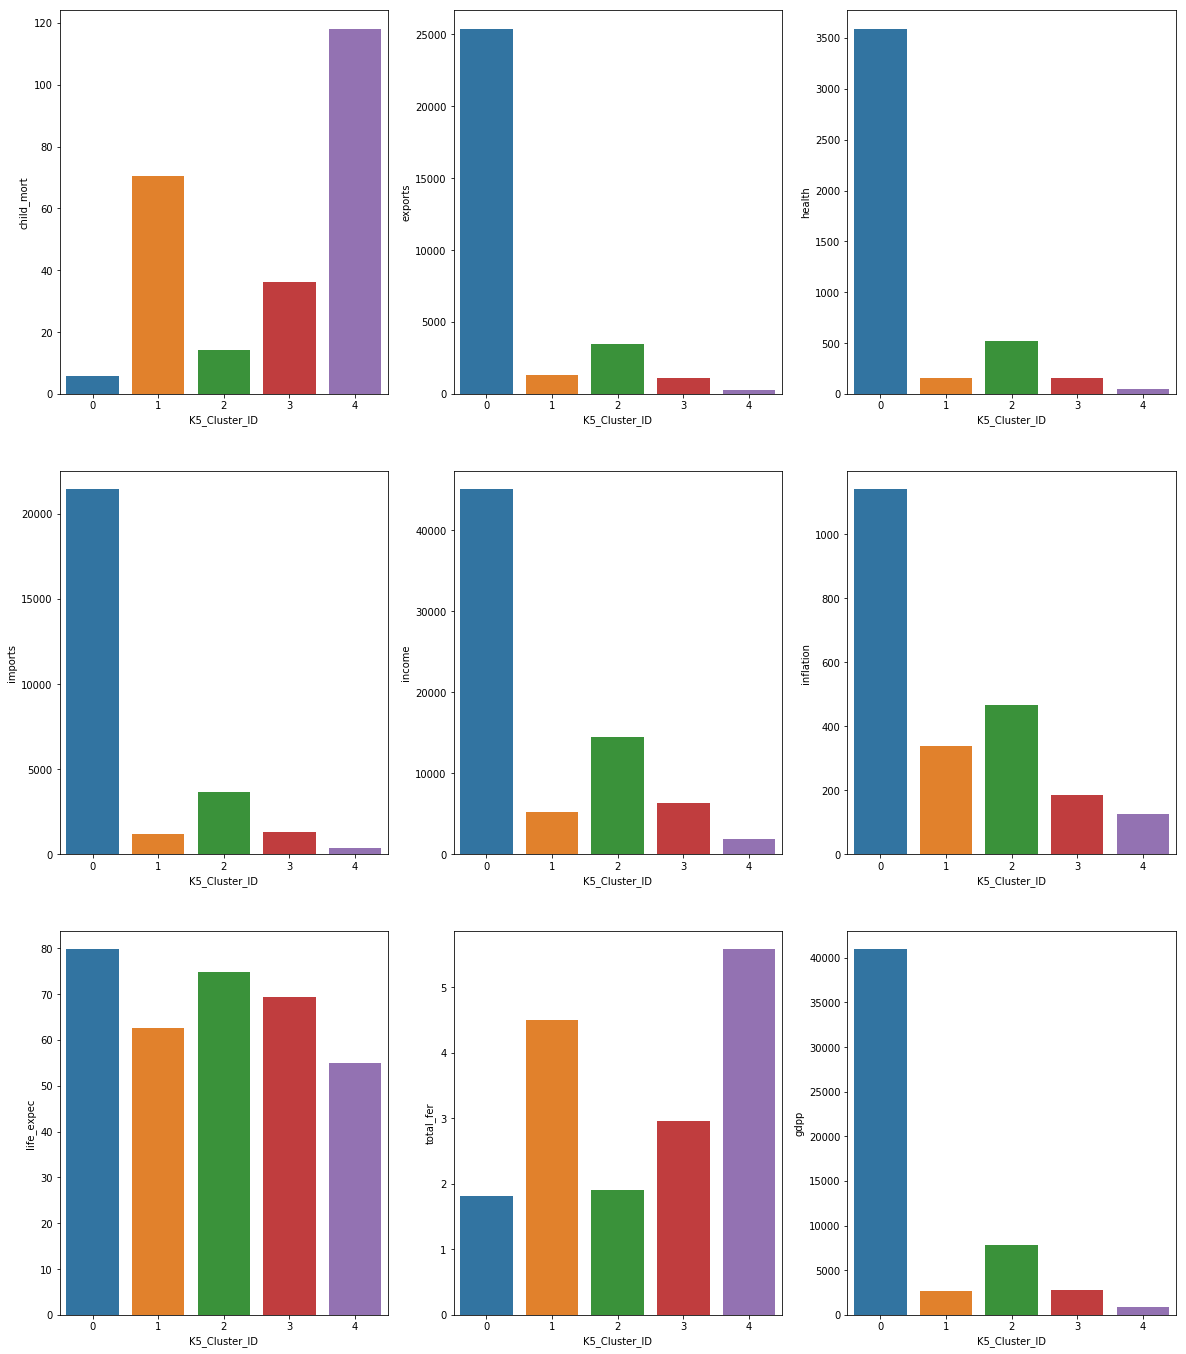

In [65]:
# Bar Plots for different clusters on mean of original features
column = final_mean_df.columns[1:10]
plt.figure(figsize=(20,24))
i=1
for each in column:
    plt.subplot(3,3,i)
    sns.barplot(x=final_mean_df.K5_Cluster_ID, y=final_mean_df[each])
    i+=1
plt.show()

From above plots we can conclude:
<li> Child mortality is very high in <b>Cluster 4</b> in comparison to other clusters.</li>
<li> Exports, Health, Income, Imports and, Inflation are very high in <b> Cluster 0</b> in comparison to other clusters as well in <b> Cluster 4</b> its very low.</li>
<li> Life expectancy is almost good in all clusters but little less in <b>Cluster 4.</b></li>
<li> Total Fertility Rate is very high in <b>Cluster 5</b></li>
<li> GDPP is significantly very low in <b>Cluster 4</b> and very high in <b>Cluster 0</b>.</li>

Now, let's see how `principal components` are associated with `original features` and `clusters`

      Feature       PC1       PC2       PC3       PC4
0  child_mort -0.302371  0.508185 -0.024434 -0.146167
1     exports  0.344219  0.354887 -0.225305  0.426821
2      health  0.349724  0.109585 -0.233096 -0.667826
3     imports  0.341031  0.319272 -0.339156  0.406455
4      income  0.389254  0.117913  0.262790 -0.061946
5   inflation  0.217812  0.222387  0.841628  0.103725
6  life_expec  0.332390 -0.412532  0.006916 -0.021390
7   total_fer -0.286549  0.489785  0.032051 -0.198909
8        gdpp  0.399902  0.168610 -0.028445 -0.361445


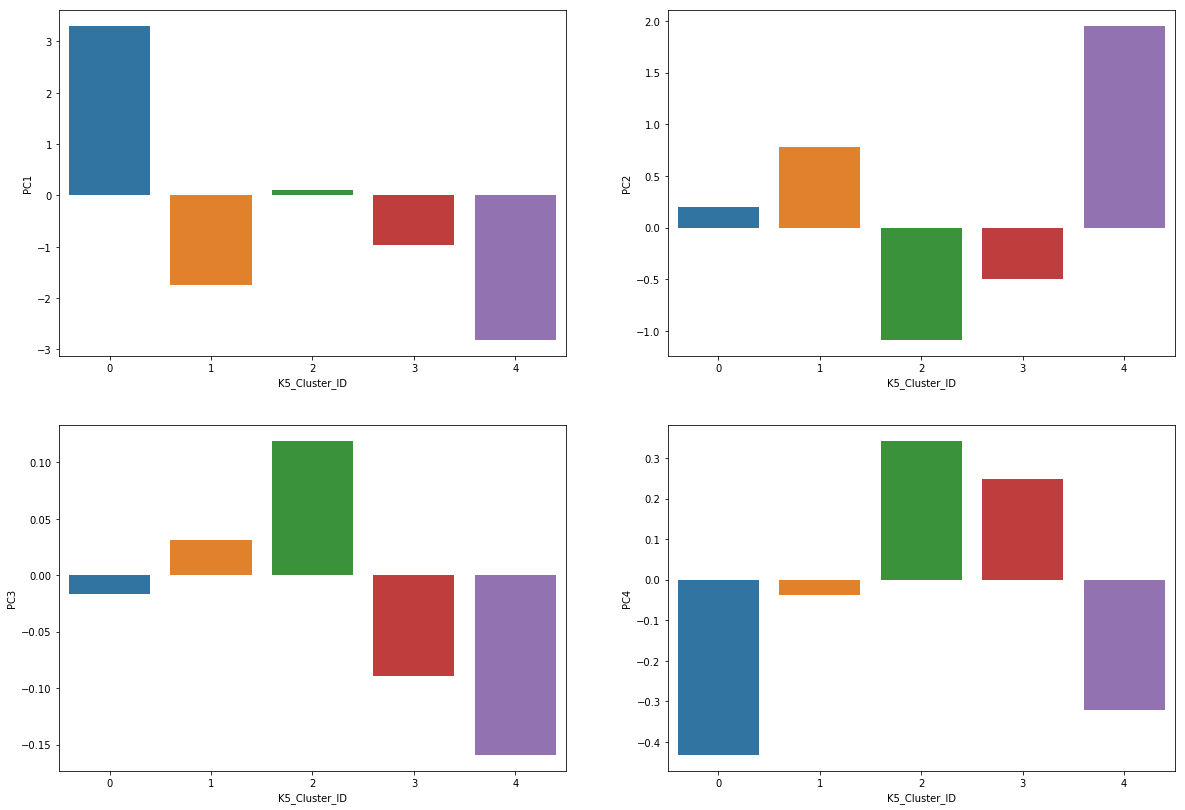

In [66]:
# Bar Plots for different clusters for principal components
column = final_mean_df.columns[10:]
print(pcs_df)
plt.figure(figsize=(20,14))
i=1
for each in column:
    plt.subplot(2,2,i)
    sns.barplot(x=final_mean_df.K5_Cluster_ID, y=final_mean_df[each])
    i+=1
plt.show()

From above `pcs_df` we can see:
1.`PC1` is negatively associated with `child_mort` and the same we can observe from `PC1` plot. It is highly correlated with `Cluster 4`.
2. `Life Expectancy` is very low in `Cluster 2` and very high in `Cluster 4`.
3. `PC3` is highly associated with `Inflation Rate` , which shows the chnage in `GDP` from last year to current year. We can observe in `Cluster 4` it is negatively associated.
4. `PC4` is highly negatively associated with `health`, then `imports` and then `gdpp`, effect of which we can observe in `Cluster 4` and `Cluster 0`.

In [67]:
country_list = final_df[final_df.K5_Cluster_ID==4].country.values.tolist()

So, from both of the above visualizations, we can conclude, `Cluster 4` is the group of countries which are having higg child mortality and low gdp.
Therefore, these countries should be funded.

In [68]:
# Below is the list of those countries:
print(country_list)

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lesotho', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Uganda', 'Zambia']
